<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/Inferential_Statistics/blob/main/6_2_Approssimazioni_col_MC_simulazioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A[[rpssimaziione Monte Carlo

I risultato asintotici sono sicuramente molto utuli per approssimare le distribuzioni campionarie. Tuttavia,nei casi piu complessi, non sono sufficienti per determinare una distribuzione campionaria. Possiamo allora cercare di "Simularla"

L'idea di fondo e' che quando disponiamo di un campine IID da una variabile aleatoria $X$, secondo la legge dedi grandi numeri

$\frac{1}{n} \sum_{i=1}^n \xrightarrow{P} E[X] $
- $X_i$ - il campione puo essere generato casualmente da una distribuzine . Potrebbe trattari di un insieme di valori di una statistica generati casualmente.

- $E[X]$ si puo trattare non banalmente della media di una popolazione ma anche dal valore stesso di una statistica o di una probabilita che la riguarda.

Per quanto detto , e' essenziale sapere come si genera un numero casuale (e poi insieme di numeri casuali da una data distribuzione probabilistica)

Ci sono essenzialmente due metodi (o algoritmi) di generalizazione di rivesione e quello di accetazzionerifiuto.

## Algoritmo di Inversione

Si basa su questo risultato fondamentale, che riguarda le distribuzioni cantinue.

Teorema: Sia X una variabile aleatoria continua con funzione di ripartizione F . allora

$$U=F(X) \sin U(0,1)$$

$$X=F^{-1}(U)$$
where $U \sim U(0,1)$

Demo:

$P(U \leq u) = P[F(x) \leq u] = P[X \leq F^{-1}(u)] = F(F^{-1}(u))= u$

NB: F e' sicuramente invertibile

$=> f_U (u)=1 $ dove $0 < u < 1$ cioe $U \sim(0,1)$

Analogamente, ogni variabile continua $X$ pip essere otttenuta per trasfrmazione da una variabile uniforme $U$, ponendo $X=F^{-1}(U)$

Pertanto l'algoritmo e' il seguente

a. si genera un valore $U \sim U(0,1)$

b. si ottiene il valore $X=F^{-1}(U)$

Esempio: come generare un numero casuale da:

$$X \sim f_X(x)= \frac{2x}{21}$$
- $2< x< 5$

Dobbiamo prima determinare la funzione di ripartizione di $X$ e la sua inversa:

$F(x) = \int_2^x \frac{2t}{21} dt = \frac{2}{21} [\frac{t^2}{2}]_2^x = \frac{x^2-6}{21}$

$F(x)= u => \frac{x^2 - 6}{21} = u$

$x^2 -4 =21u$

$x^2=21u+6$

$x=\sqrt{21u+6}$

NB:solo la soluzione positiva:

a. generare $U$ da $U(0,1)$

b. porre $X=\sqrt{21U + 6}$

Il metodo funzione anche quando $X$ non e' continuo - la funzione di ripartizione, in questo caso non e' invertibile , ma si puo usare l'inversa generalizzata gia vista coni quantili




Esempio:

SIa
$
\begin{equation}
  X \sim p(x) =
    \begin{cases}
      0.2 &  x=1\\
      0.25 & x=5 \\
      0.55 & x=6 \\
      0 & altrove
    \end{cases}       
\end{equation}
$

Ossia $X$ assume solo i valori 1,5,6 e

| x | p(x) | F(x) |
|---|---|---|
|1|0.2|0.2|
|5|0.25|0.45|
|6|0.55|1|
||1||

L'iodea e' quella di diveidere l'intervallo (0,1) in parti proporzionali rispetto alla prob. Ad ogni subintervallo corrisponde un valore.




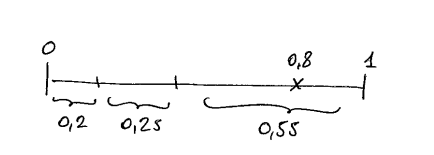

Considerato ora un valore $u$ in $(0,1)$ il valore di $X$ si ottiene individuando il sub.intervallo in cui cade $u$ . Ad esempio se $u=0.8 => x=6$

cioe $6=F^{-1}(0.8)$

Algoritmo:

a. generare $U$ da $U(0,1)$

b. Porre
- $x=1$ se $0 \leq U \leq 0.2$
- $x=5$ se $0.2 < U \leq 0.45$
- $x=6$ se $0.45 < U \leq 1$

ossia porre $X = F^{-1}(U)$

Nota: L'algoritmo di inversione richiede sempre il calcolo di una funzione inversa, il che non e' sempre agevole.

Talvolta si puo pensare di generare numeri da una distribuzioni altrui risultati noti debba probabilita (ad esempio, il legame tra l'esponenziale e la gamma). Se anche questo non e' possibile, si po ricorrere ad altri algortmi come quallo di accetazione rigiuto.




Esempio- continua

Dato un campione $X_1,X_2 ...X_n$ IID $\sim X$ con

$$X \sum f_X (x)= \frac{2x}{21} $$
- $2 < x < 5$

e la statistica $T = \frac{1}{n} \sum+_{i=1}^n \sqrt[3]{x_i-2}$

descrivere due algoritmi pere simulare
- $E[T]$
- $P(T < 0.6)$

Algortmo per E(T):

a. generare $u$ da $U(0,1)$
b. porre $x=\sqrt{21u+4}$
c. ripetere a->b $n$  volte ottenendo $x_1..x_n$
d. calcolare $t= \frac{1}{n} \sum_{i=1}^n \sqrt[3]{x_i-2}$
e. ripetere a-> d N volte ottenendo $t_1..t_N$
f. calcolare $\frac{1}{N} \sum_{i=1}^N t_i$

$$\frac{1}{N} \sum_{i=1}^N t_i \xrightarrow{P} E(T) $$

Algoritmo per P(T< 0.4)

a. ...
b. ....

e. calcolare

$
\begin{equation}
  I_{[0 ; 0.4)(t)}  =
    \begin{cases}
      1 & \text{ se } 0 \leq t < 0.4\\
      0 & \text{ se } t \geq 0.4
    \end{cases}       
\end{equation}
$

f. ripeter a-> d N volte ottenendo $I_1, I_2...I_N$

g. calcolare $\frac{1}{N} \sum_{i=1}^N I_j$

$\frac{1}{N} \sum_{i=1}^N I_j \xrightarrow{P} E(I ) = P(T < 0.4)$

## Algoritmo di Accetazione/Rifiuto

Spesso noto come "Regection Sampling"

Supponiamo di voler generare casualmente un valore da $Y \sim f_y$ ma di non poter applicare il classico metodo di inversione.

Supponiamo tuttavia che $Y$ abbia supporto limitato (o porlomeno che possiamo trovare un intervallo limitato rilevante) e che , in questo supporto la densita sia limitata  ossia che riusciamo a trovare una costante 4C4 tale che

$max_{y \in S} f_Y (y) \leq c$

si ottine una situazione come quaella in figura:



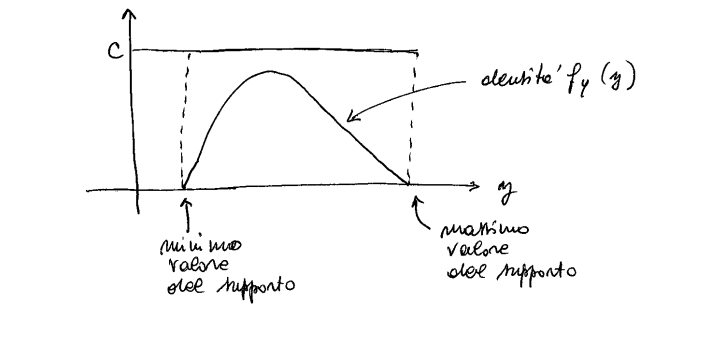

Siumulare un valore da $Y$ vuol dire generare un valore nel suo supporto in modo tale che sia piu probabile trovare un valore dove la densita e' piu alta (considerando che essa non puo andare oltre $c$)

Una semplice idea e' dunque:
- generare un valore uniformemente nel supporto: V
- accetare il valore Vsulla base di un secondo valore D genrato uniformemente tra 0 e c

D- e; una sorta di "densita potenziale" associata a V: se questa densita e' minore di quella associata  del modello $f_y$ allora V puo essere accetato, altrimenti va rifiutato e l'estrazione va rifiutata

Piu nello specifico supponendo per semplicate che $Y$ abbia supporto in [0,1]
a. si geerano due valori U,V da $U(0,1)$

b.si accetta il valore $V$ , ponendo $Y=V$ se $cU \leq f_Y(V)$ oppure $ U\leq \frac{1}{c} f_Y(V)$

c. se il valore non e' accetato si ripete fino a quando la doncuzione sopra non e' accettata

Qual e' la probabilita che il valore venga accettato

$P(cU \leq g_Y(V)) = P(U \leq \frac{1}{c} f_Y(V))= \int_0^1 \int_0^{\frac{1}{c} f_Y (N)} du dv$

$$ \int_0^1 \frac{1}{c} f_Y (v) dv = \frac{1}{c} \int_0^1 f_Y(v) dv = \frac{1}{c }$

Pertanto piu alto e' $c$ piu alto sara il numero di valori $V$ generati e poi scartati. Per rendere l'algoritmo il piu velora possibili vonviene allora porre $c= max{y \in S} f_Y (y)$

In realta l'algortmo potrebbe ancora di piu essere velocizzato se il valore $V$ condidato fosse gia generato da una disribuzione che "assomiglia" a quella di Y

V- dovrebbe essere dunque generato da una distribuzione il cui supporto cantega o coincida con il supporto di $Y$ . Ad ogni valore generato si associera una "densita" potenziale calcolata sulla base della densita di $V$ e, in particolare data da un multiplo M di questa densita:
- valore condidato - V
- densita potenziale: $U M f_V(V)$ dove $U \sim (0,1)$
  - accetazione avvera in base alla condizone

  $$UM f_V(V) \leq f_Y(V)$$ oppure

  $$U \leq \frac{1}{M} \frac{f_Y(V)}{f_V(V)}$$

  - $f_V$- quella che prima era la costante- $c$

  

L'algoritmo puo dunque essere definito cosi:
- date due densita $f_Y $ e $f_V$ con lo stesso supporto e tali che $1 < M < \infty$ con
$$M = sup_{y} \frac{f_y (y)}{f_V (y)}$$

a. si genera un valore V da $f_V$

b. si genera un valore U da U(0,1) e si accetta il valore V ponendo Y=V se

$$U \leq \frac{1}{M} \frac{f_Y (V)}{f_V (V)}$$

c. se il valore non e' accettato si ripete fino a quando la condizione sopra non e' verificata



Nota: oni densita $f_V$ puo esssere usata a questo scopo , perche il supporto sia piu ampio della distrib.di simulare (ad esempio, non si puo usare una distribuzione con code leggere per simularne una con code penenti)- al limite, $f_V$ puo anceh non essere una densita propria (cioe che non integra ad 1) . DIventa dunque un prblema usare l'algoritmo per simulare da distribuzione con code penenti: si possono allora usare algoritmi alternativi.


Si tratta degli algortmi della clase MCMC che creano una sequenza (catena) in cui lo stato attuale, oltre che della generalizone corrente, dipende dallo stato precedente in modo che la tena "apprenda" dal pasato e cenvega pu rapidamente.

Ta;o algoritmi (nello specifico un suo caso particolare il Gibs Sample) sono molto usat nell'infgerenza Bayesiana.


